## Data Classification

In [1]:
#import the relevant libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#load our data
df = pd.read_csv("../data/heart_disease_health_indicators_BRFSS2015.csv", delimiter=",")

***
***

## Week 3 Notebook: Step 3. Pearson correlation matrix

In order to build any model we must specify a **target variable/dependent variable** and one or more **feature variables/independent variables**.

- **(X)** = feature or independent variable
- **(y)** = target or dependent variable - in this case, 'Attrition'

In order to figure out what variables to choose as feature(s), aka, which variables we will use to tr to predict our target, we create a **correlation matrix**. 

The correlation matrix we will create visualizes the **pearson correlation** between the variables in the dataset. Other correlation methods include: 
- Spearman 
- Kendall 
- Gamma 
- Eta 

In [2]:
# `corr`: The computed correlation matrix
# Method = pearson
# Numeric values only. A correlation cannot take into account qualitative data unless they are transformed. More on that in week 7
corr = df.corr(method='pearson', numeric_only=True)
corr

HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.011543  -0.023730   
AnyHealthcare                     0.018734  0.038425  0.042230   0.117626   
NoDocbcCost                       0.031000  0.017358  0.013310  -0.058255   
GenHlth                           0.258383  0.300530  0.208426   0.046589   
MentHlth                          0.064621  0.056456  0.062069  -0.008366   
PhysHlth                          0.181698  0.161212  0.121751   0.031775   
DiffWalk                          0.212709  0.223618  0.144672   0.040585   
Sex                               0.086096  0.052207  0.031205  -0.022115   
Age                               0.221618  0.344452  0.272318   0.090321   
Education                        -0.099600 -0.141358 -0.070802   0.001510   
Income                           -0.141011 -0.171235 -0.085459   0.014259   

                           BMI    Smoker    Stroke  Diabetes  PhysActivity  \
HeartDiseaseorAttack  0.052904  0.114441  0.203002  0.180272     -0.087299   
HighBP                0.213748  0.096991  0.129575  0.271596     -0.125267   
HighChol              0.106722  0.091299  0.092620  0.209085     -0.078046   
CholCheck             0.034495 -0.009929  0.024158  0.067546      0.004190   
BMI                   1.000000  0.013804  0.020153  0.224379     -0.147294   
Smoker                0.013804  1.000000  0.061173  0.062914     -0.087401   
Stroke                0.020153  0.061173  1.000000  0.107179     -0.069151   
Diabetes              0.224379  0.062914  0.107179  1.000000     -0.121947   
PhysActivity         -0.147294 -0.087401 -0.069151 -0.121947      1.000000   
Fruits               -0.087518 -0.077666 -0.013389 -0.042192      0.142756   
Veggies              -0.062275 -0.030678 -0.041124 -0.058972      0.153150   
HvyAlcoholConsump    -0.048736  0.101619 -0.016950 -0.057882      0.012392   
AnyHealthcare        -0.018471 -0.023251  0.008776  0.015410      0.035505   
NoDocbcCost           0.058206  0.048946  0.034804  0.035436     -0.061638   
GenHlth               0.239185  0.163143  0.177942  0.302587     -0.266186   
MentHlth              0.085310  0.092196  0.070172  0.073507     -0.125587   
PhysHlth              0.121141  0.116460  0.148944  0.176287     -0.219230   
DiffWalk              0.197078  0.122463  0.176567  0.224239     -0.253174   
Sex                   0.042950  0.093662  0.002978  0.031040      0.032482   
Age                  -0.036618  0.120641  0.126974  0.185026     -0.092511   
Education            -0.103932 -0.161955 -0.076009 -0.130517      0.199658   
Income               -0.100069 -0.123937 -0.128599 -0.171483      0.198539   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
HeartDiseaseorAttack -0.019790  ...       0.018734     0.031000  0.258383   
HighBP               -0.040555  ...       0.038425     0.017358  0.300530   
HighChol             -0.040859  ...       0.042230     0.013310  0.208426   
CholCheck             0.023849  ...       0.117626    -0.058255  0.046589   
BMI                  -0.087518  ...      -0.018471     0.058206  0.239

### REMARKS:

Of course in our case all values are numeric of type float64.

### 3.1 Heatmap (from notebook)

We have constructed a pearson correlation matrix, however for better readability we will create a **heatmap** based on our correlation matrix. A heatmap is basically a graphical representation of the data that uses color coding to represent different values. 


Here we use the library Seaborn which we defined as 'sns'.

The Pearson correlation coefficient measures the linear relationship between two variables.
Its value ranges from -1 to 1, where:
- **1** implies a perfect **positive linear relationship**. If one variable increases, the other variable increases as well
- **-1** implies a perfect **negative linear relationship**. When one variable increases, the other variables decreases
- **0** implies **no relationship** between the variables

<Axes: >

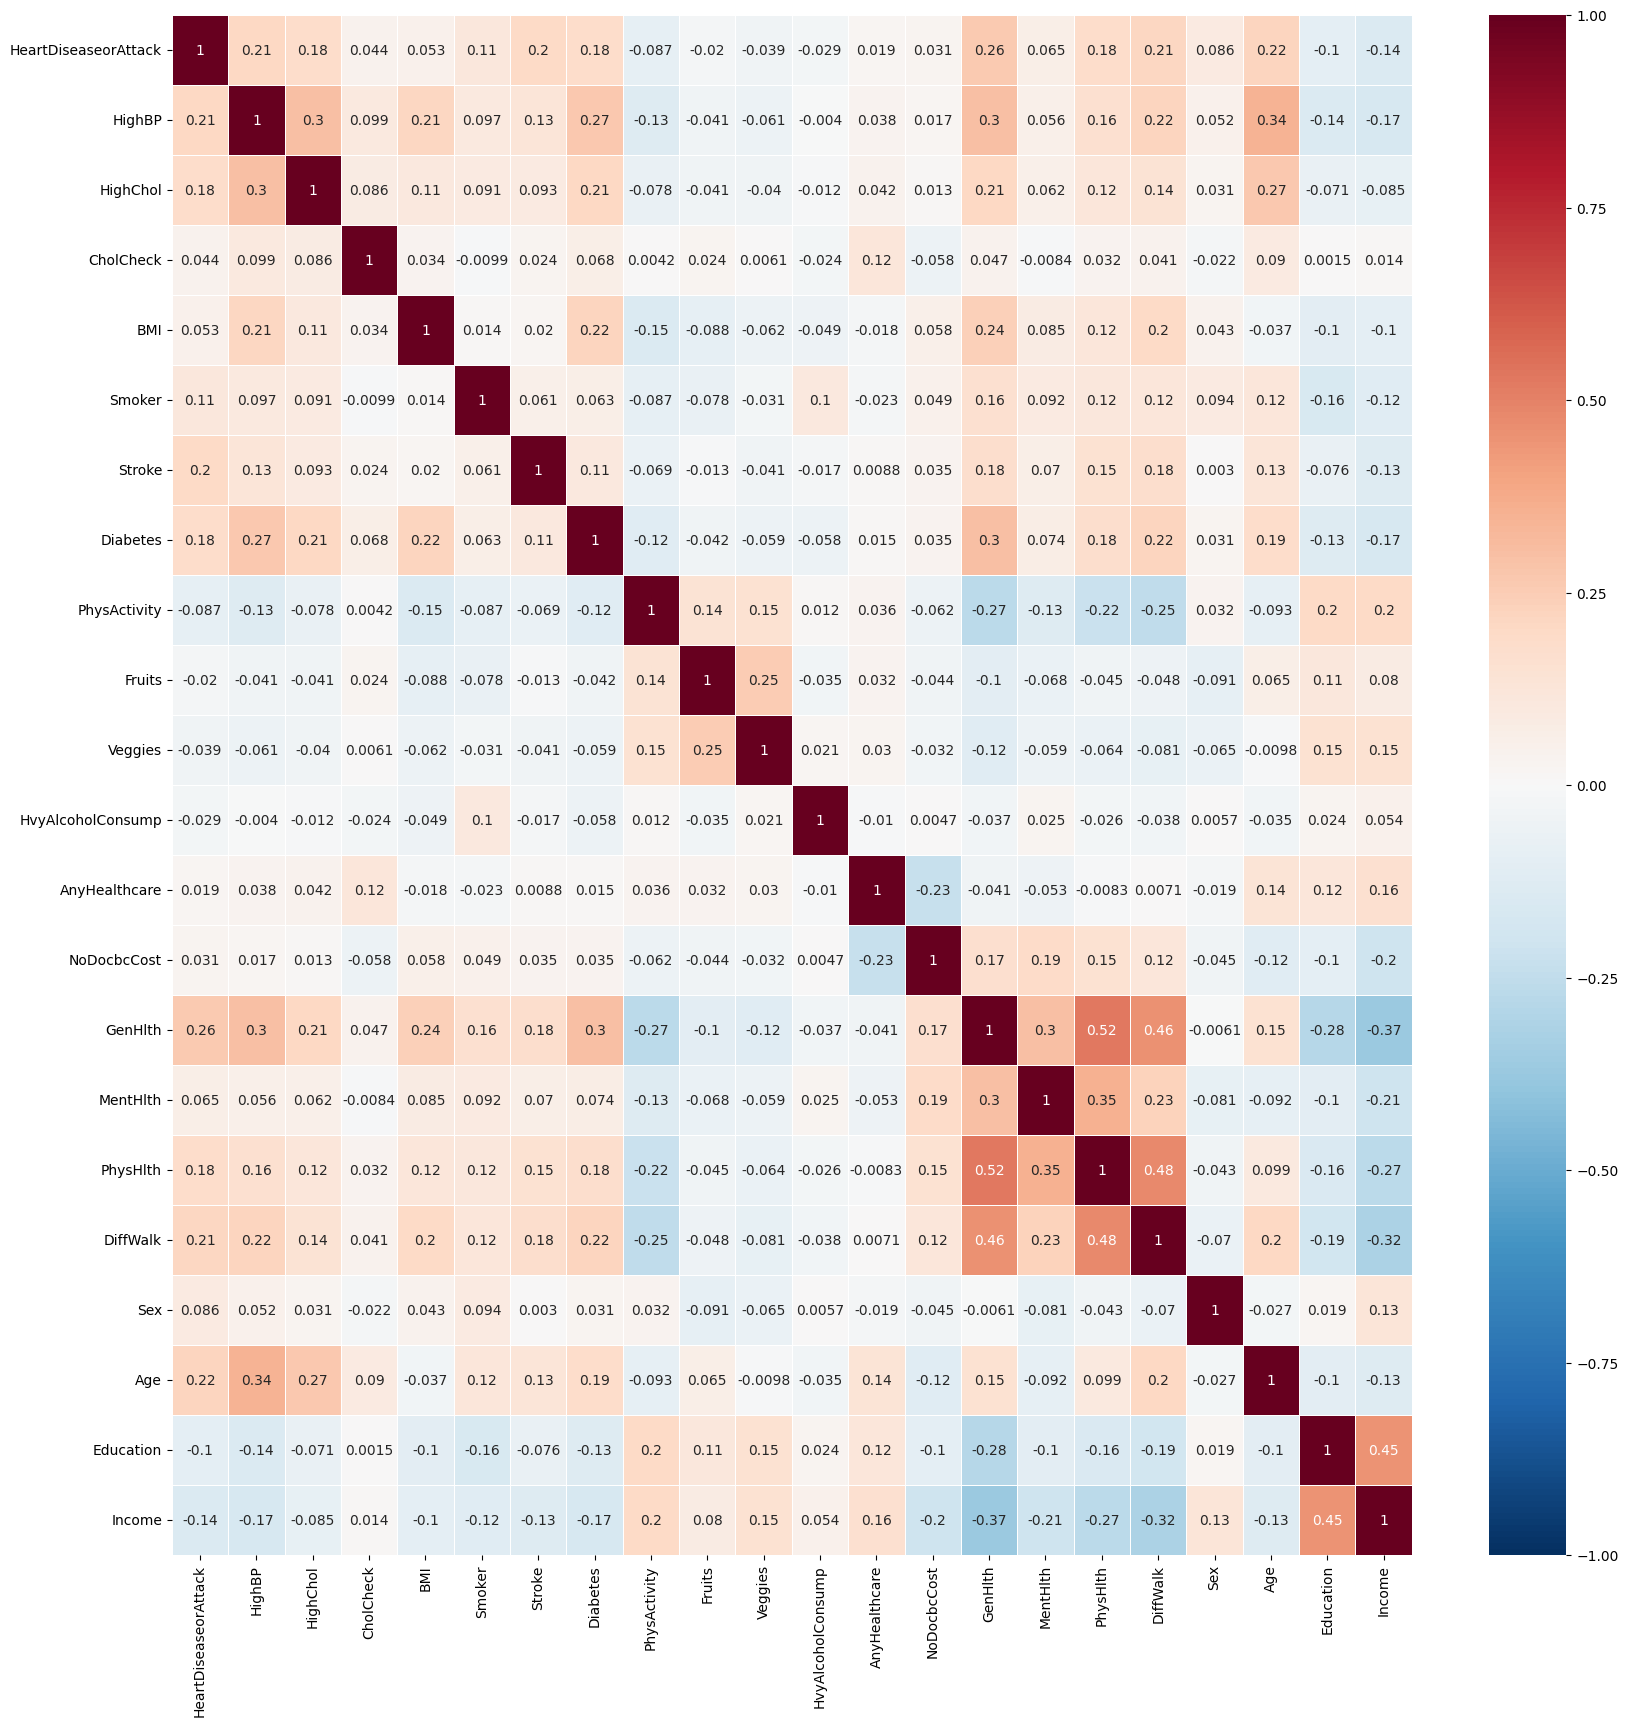

In [3]:
# We create a new figure (fig) and axis (ax) with a specified size.
fig, ax = plt.subplots(figsize=(20,20)) # Adjust the figsize values to change the size of each cell in the heatmap.

# - `xticklabels` & `yticklabels`: Use the columns of the correlation matrix for labeling the x and y axis respectively.
#   blue represents positive correlations and red represents negative correlations.
sns.heatmap(corr, vmin= -1, vmax=1, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

<Axes: >

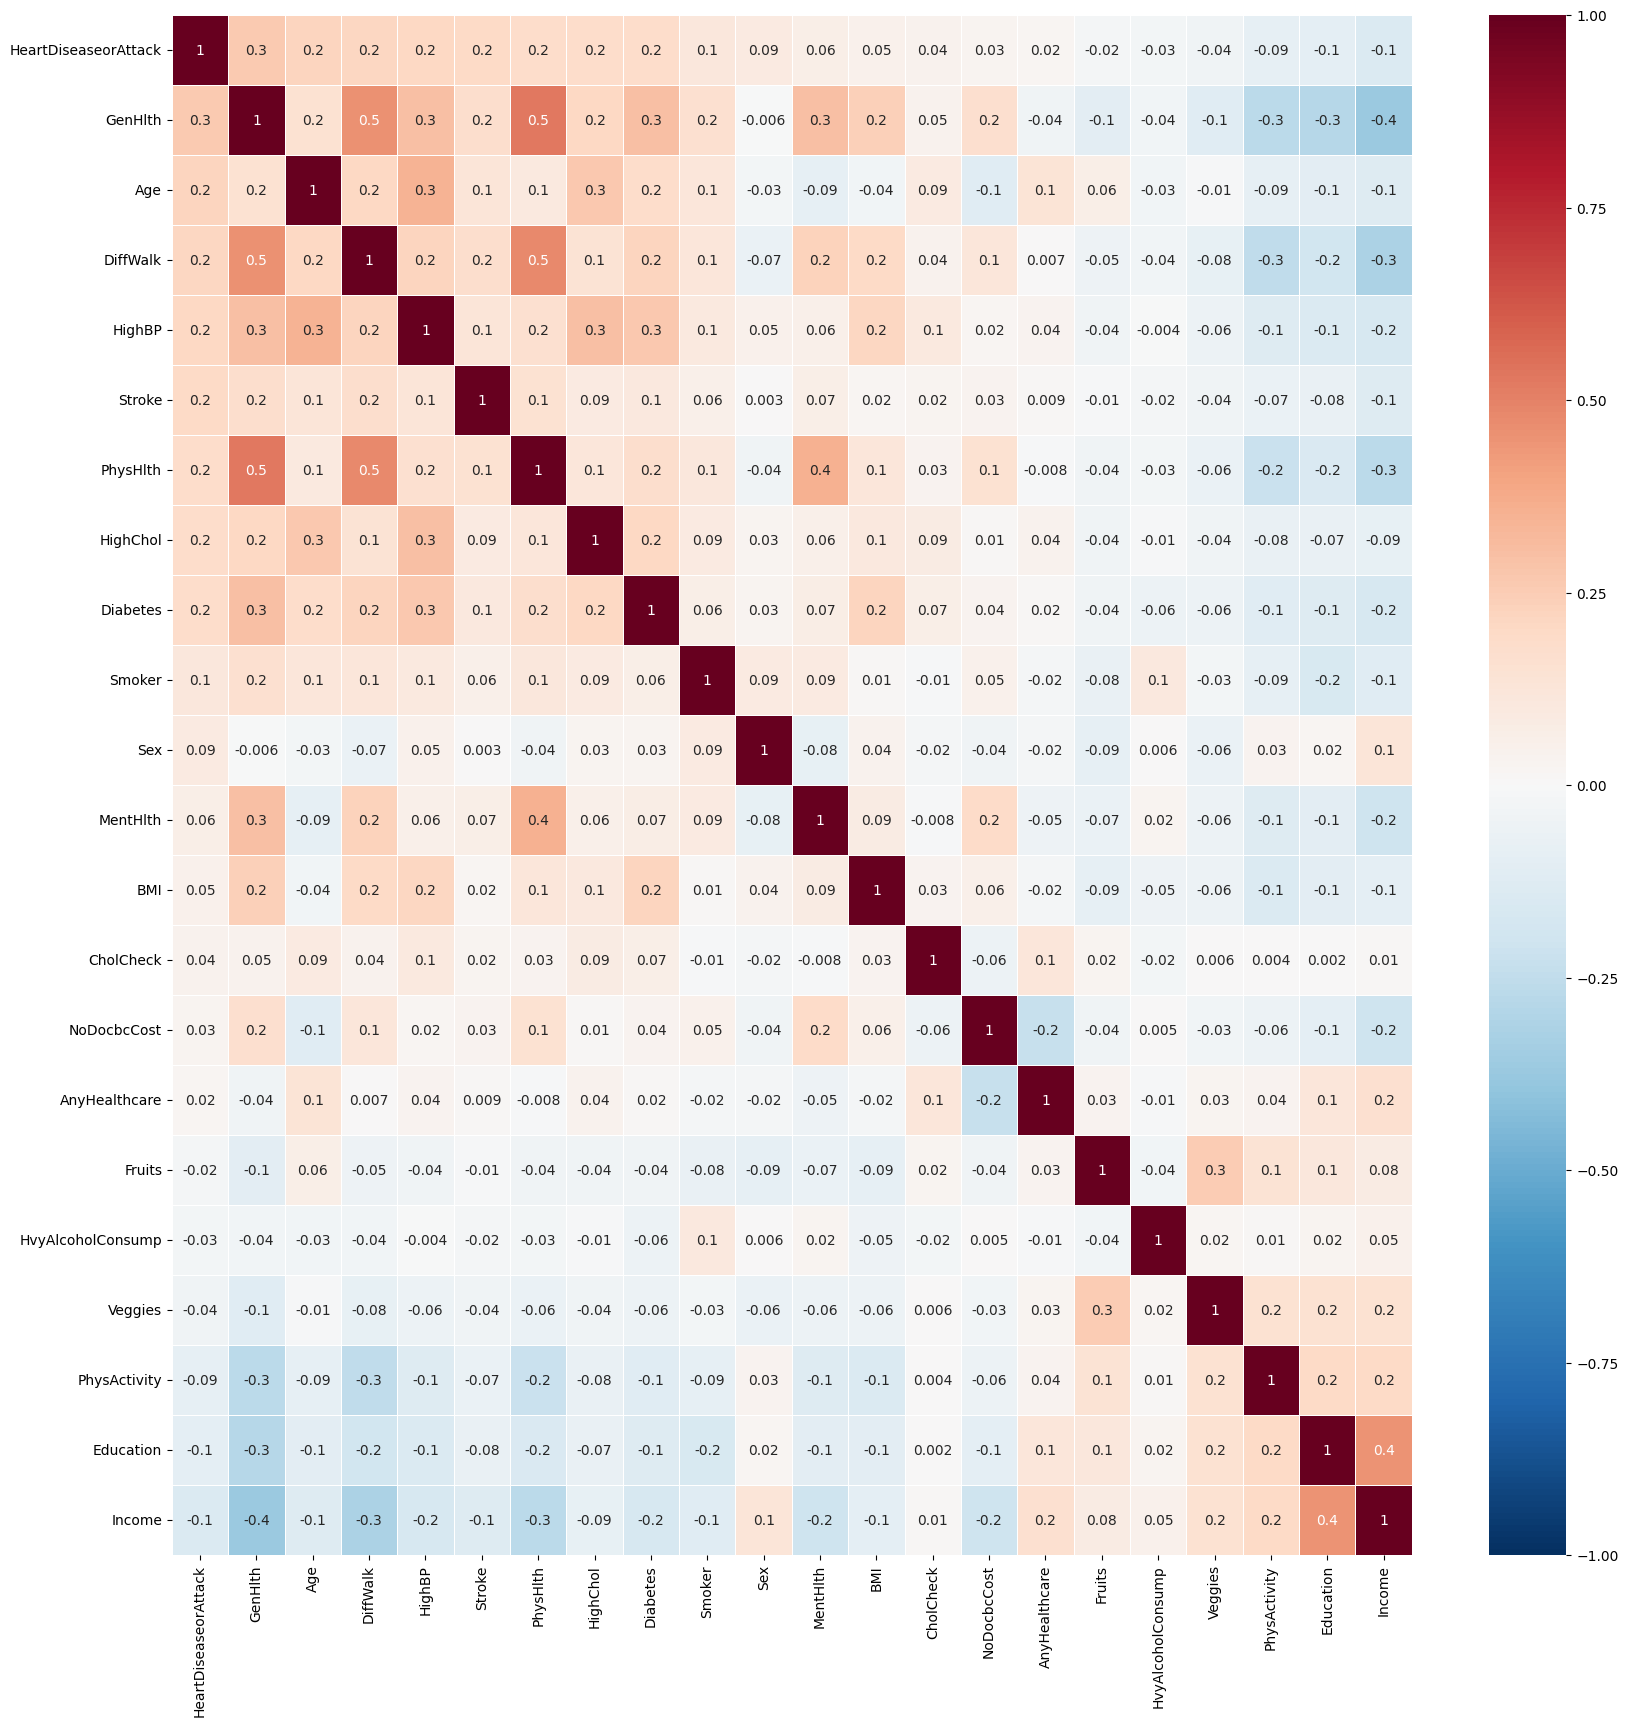

In [26]:
# Sort the heatmap to have a better overview of the different correlations.
col = df.corr().nlargest(48, "HeartDiseaseorAttack").HeartDiseaseorAttack.index

plt.figure(figsize=(20, 20))
sns.heatmap(df[col].corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True, linewidth=0.5, annot_kws={"size":10}, fmt='.1g')

### REMARKS:

**Positive correlations - at first glance:**
- Strong positive correlation between general health and:
    - physical health and difficulty walking (makes perfect sense).
    - as well as high blood pressure, diabetes, heart disease, BMI
- Mental healthy is also highly related with the heneral health and physical health
- Another very logical connection - strong positive correlation between Education and Income

**Heart disease or attack (our target variable) correlation variables:**

**Positive correlation (aka the higher this value is the higher the chance for heart disease):**
- 0,26 - General health 
    - **explained through the grading scale - 1 is Excellent health, while 5 is Poor health, so the higher this value is -> the poorer your general health is -> the higher the chance for a heart disease**
- 0,22 - Age
- 0,21 - Difficulty walking
- 0,21 - High blood pressure
- 0,20 - Stroke
- 0,18 - Physical health - (same as general health)
- 0,18 - High cholesterol
- 0,14 - Diabetes
- 0,11 - Smoker
- 0,086 - Sex
    - **(women being 0, men being 1 - this implies that man are more prone, but also the grading itself is unjust - in order for it to show full neutrality in this case woman have to be -1 and the amount of men and women must be equal)**
- 0,065 - Mental health
- 0,053 - BMI
- 0,044 - Cholesterol Check
- 0,031 - No Doctor because Cost
- 0,019 - Any health care

**Negative correlation (The higher this variable (in the negative direction) is the lower the chance for heart disease):**
- -0,14 - Income
- -0,10 - Education
- -0,087 - Physical Activity
- -0,039 - Veggies
- -0,029 - Heavy alchohol consumption
    - **( 0 is not a heavy drinker, 1 is heavy drinker - so the more negative this value is the lower the chance for heart disease )**
- -0,020 - Fruits


So **TOP 11** predictive factors of heart disease are:
- 0,26 - General health
- 0,22 - Age
- 0,21 - Difficulty walking
- 0,21 - High blood pressure
- 0,20 - Stroke
- 0,18 - Physical health 
- 0,18 - High cholesterol
- 0,14 - Diabetes
- -0,14 - Income
- 0,11 - Smoker
- 0,10 - Education



<Axes: >

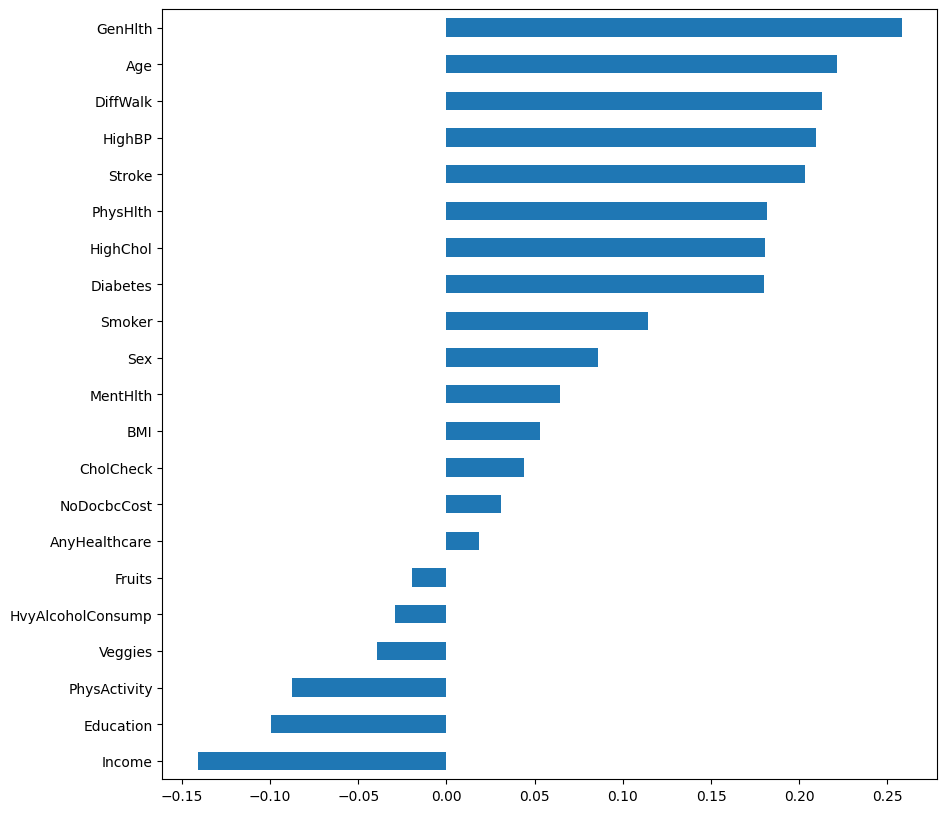

In [4]:
df.drop('HeartDiseaseorAttack', axis=1).corrwith(df.HeartDiseaseorAttack).sort_values().plot(kind='barh', figsize=(10, 10))

Already from this graphic in the visualization part we saw which are the most relevant categories, but the heatmap gave us also the exact values.

### Scatter plots

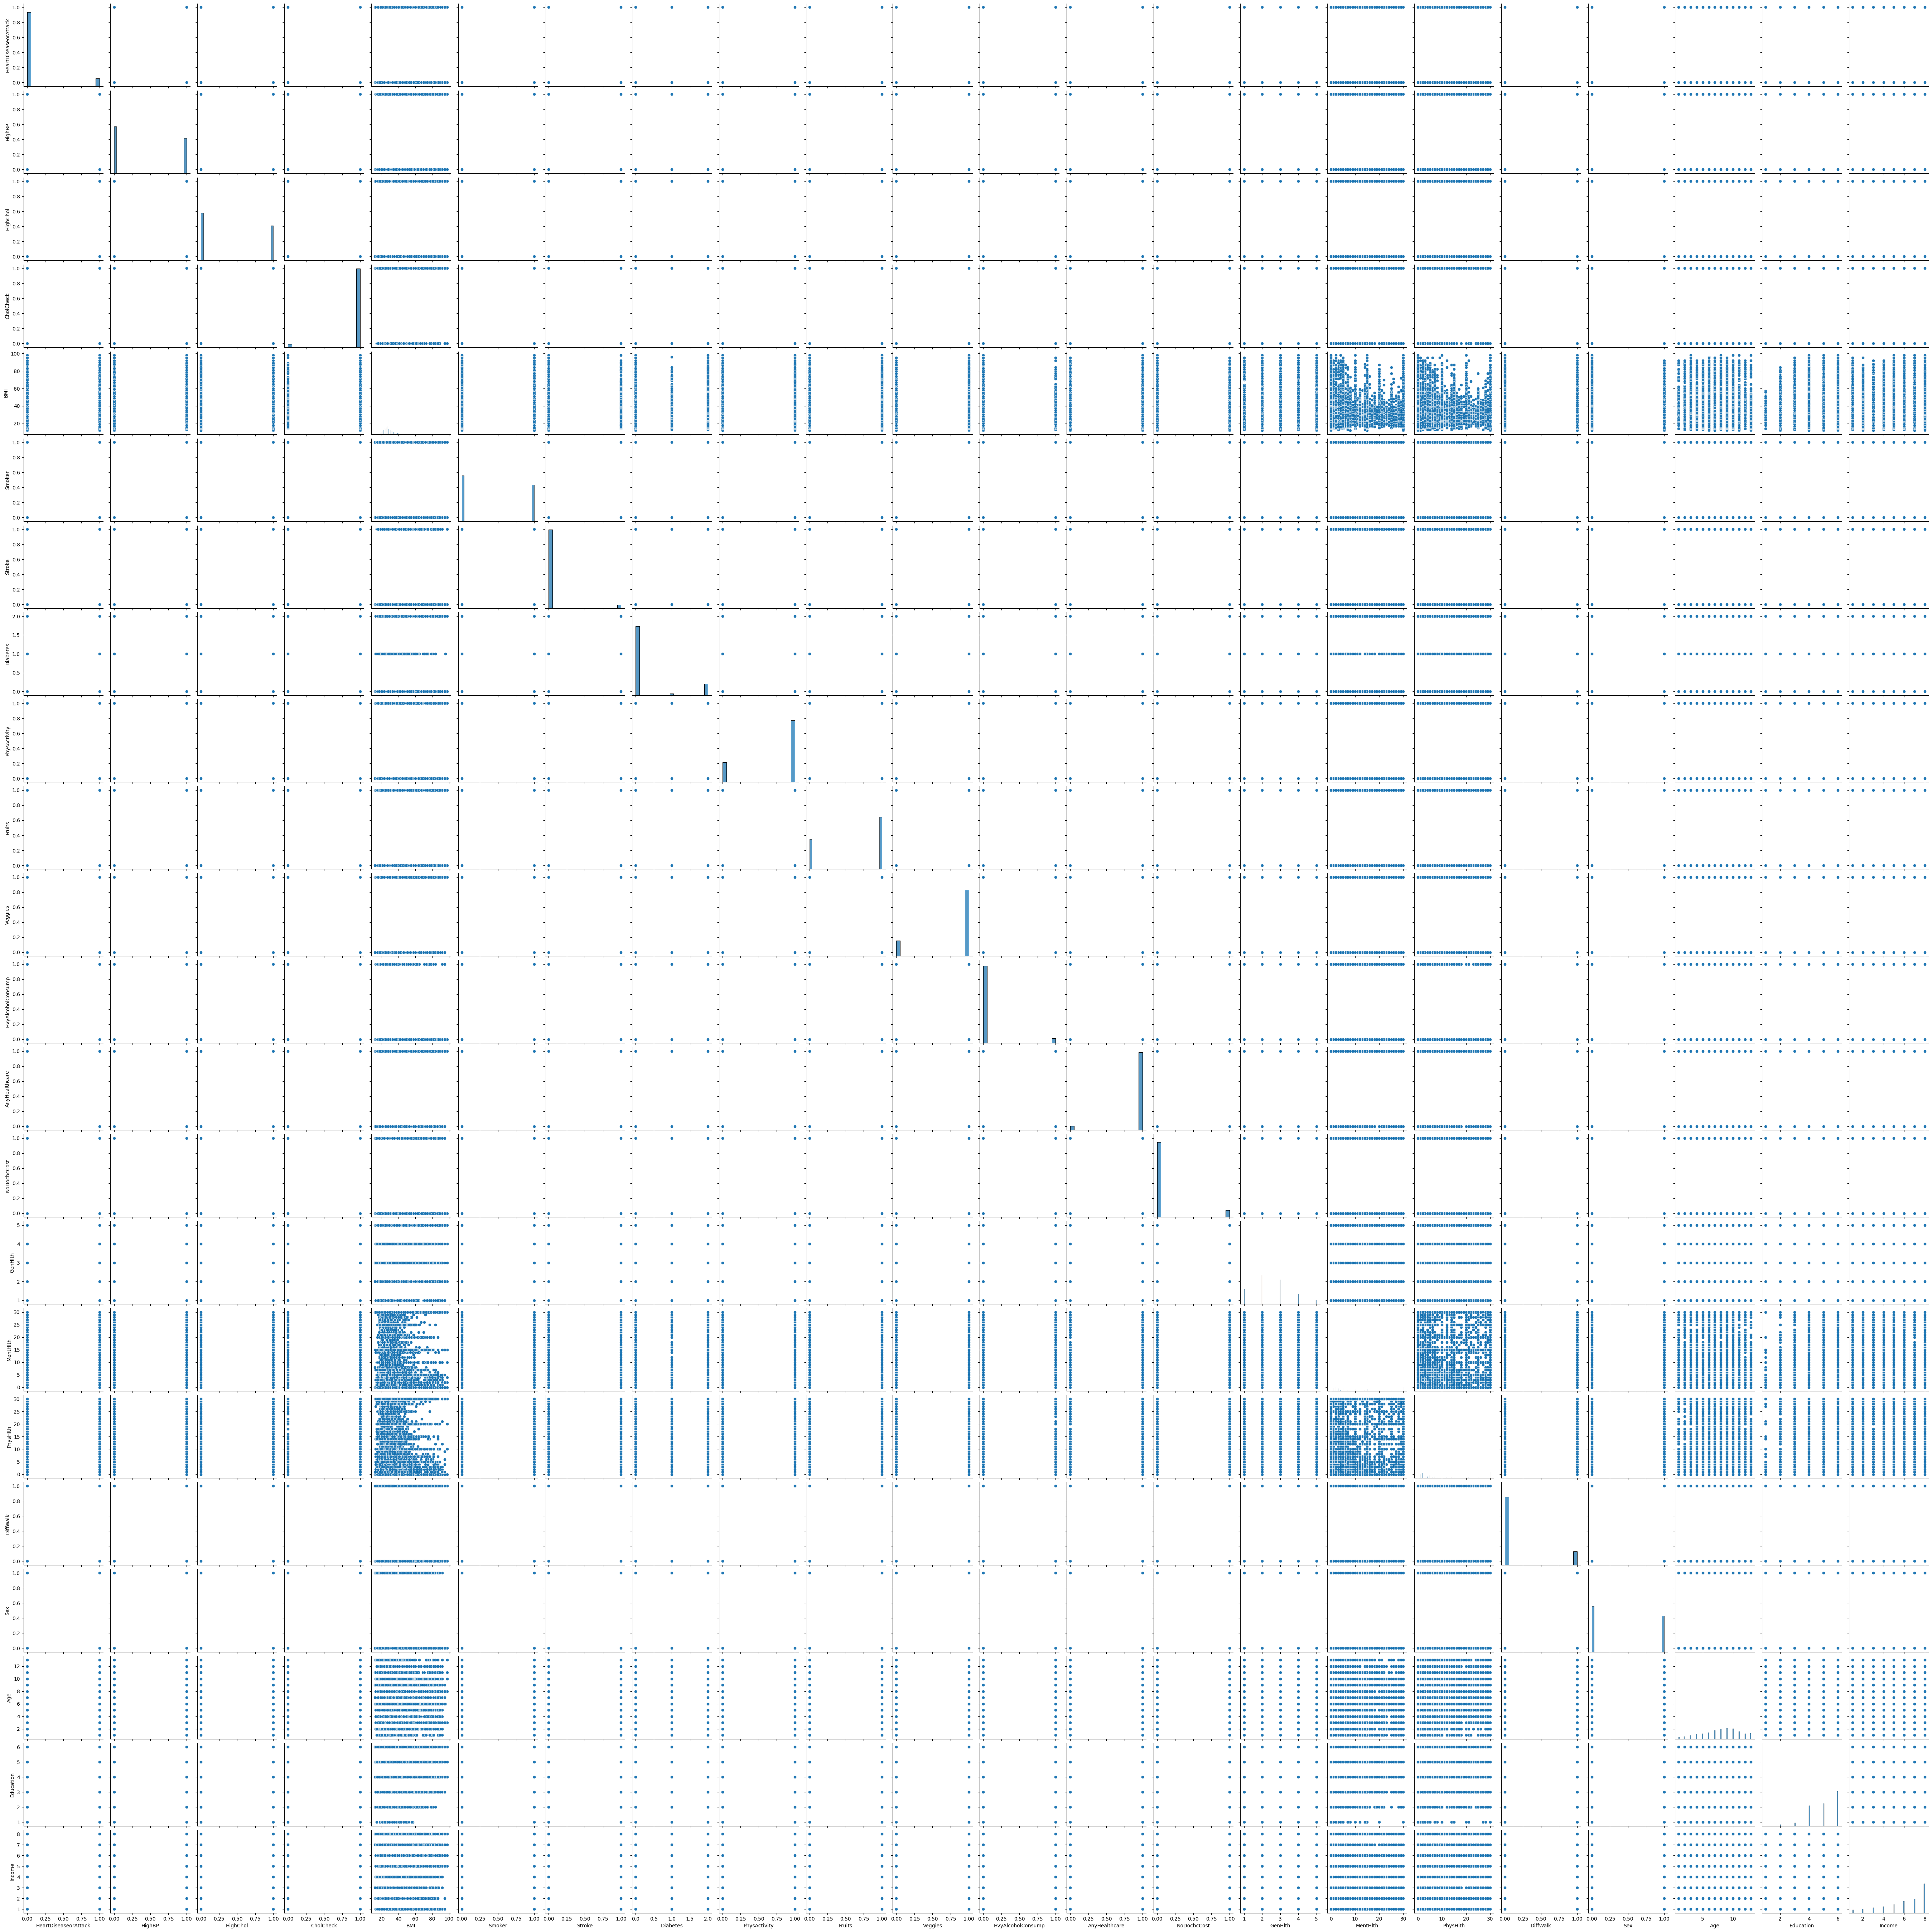

In [5]:
sns.pairplot(data=df) 

### Remarks

- Scatter plots are great visualization tools when it comes to representing variables which have a wide range values (continuous values). In our case most of the variables are binary, a few are on a relatively limited scale and only few are wide in range (BMI, mental health and physical activity). Therefore our scatter plot looks pretty boring and not too insightful.
- the few correlations that look a bit more interesting are:
    - BMI - Physical health
    - BMI - Mental Health
    - Mental Health - Physical health
    - yet, they are not too insighful either
- Overall scatter plots are not the best tools when it comes to classifications

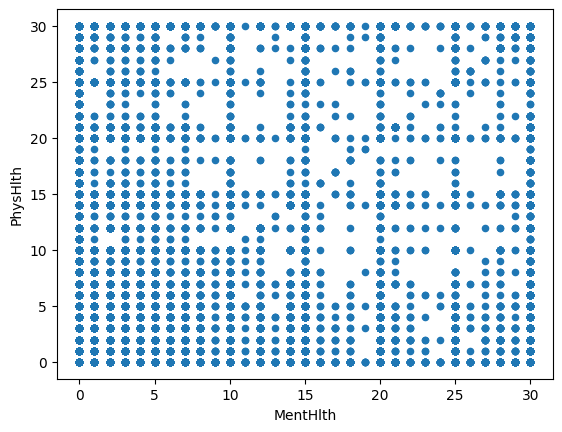

In [6]:
df.plot(x='MentHlth', y='PhysHlth', kind='scatter')

plt.show()

### 3.3 Feature Selection

After we examined our data and found that some variables are more correlated to heart disease than others, we decide to proceed with our TOP 11 features from now on.

###### /* We examined that some features are more related than other, nevertheless we wish to proceed with all of them since all are proved to be related to an extent. /* 

In [7]:
# Below, we make a list of features/independent variables 'X', and specify our target/dependent variable, y
# The model will guess/predict the 'y' feature (our target) based on the list of features, 'X'
# Running the cell will not produce any output. This is because we are defining X and y, which we will be using in the next section to train our model

X = df[['GenHlth', 'Age', 'DiffWalk', 'HighBP', 'Stroke', 'PhysHlth', 'HighChol', 'Diabetes', 'Income', 'Education', 'Smoker']].values

y = df['HeartDiseaseorAttack'].values

In [8]:
# represents the values of each independent feature of each respondent

X

array([[5., 9., 1., ..., 3., 4., 1.],
       [3., 7., 0., ..., 1., 6., 1.],
       [5., 9., 1., ..., 8., 4., 0.],
       ...,
       [1., 2., 0., ..., 2., 5., 0.],
       [3., 7., 0., ..., 1., 5., 0.],
       [2., 9., 0., ..., 2., 6., 0.]])

In [9]:
# represents the value of our target variable in each response
# aka if they have a heart disease or attack (1) or don't have it (0)

y

array([0., 0., 0., ..., 0., 0., 1.])

***
***

## 4. Decision Trees

https://youtu.be/_L39rN6gz7Y?si=OSB_Y0D0rQbl2Enz

![image.png](https://miro.medium.com/max/1275/0*0dN6d8THyImxwPeD.png)

### 4.1 Splitting the dataset into "train" and "test" (notebook)

In order to train our Decision Tree Classifier model and evaluate it afterwards, we need to split our data into two new datasets: a training sample and a test sample. We train our model on our the training dataset and when the model is ready, we test it's <font color = pink><b>prediction accuracy</b></font> using the test dataset.

- X_train and y_train will be used for training the model
- X_test and y_test will be used for evaluating the model's performance
- 80% of the data will be used for training, and 20% for testing. You can also split it 70:30, as long as each set is representative of the overall distribution.
- Random_state shuffles the data before the split. We set it to 0 to ensure reproducibility (in other words, everytime this code is run we get the same split. This ensures consistet results accross runs. In other wwords, when you run the code, you get the same split as when we (the TAs) ran the code)

NB: An important issue might arise knowing that the vectors, both target and feature are ordered. Therefore, if we split them into train and test datasets, what guarantees that both sets will include all labels and all type of feature vectors? **Luckily the train_test_split() method takes care of this by random shuffling the data before applying this split.**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [11]:
# just previewing are training data for the independent features looks the same
X_train

array([[ 2.,  7.,  0., ...,  7.,  5.,  1.],
       [ 3.,  3.,  0., ...,  6.,  5.,  0.],
       [ 1.,  6.,  0., ...,  8.,  6.,  0.],
       ...,
       [ 3., 13.,  1., ...,  6.,  4.,  0.],
       [ 3., 12.,  0., ...,  7.,  5.,  1.],
       [ 3., 12.,  0., ...,  7.,  5.,  1.]])

### 4.2 Building the Classification Decision Tree

We use the 'sklearn' package to build our Classification Tree model. The Sklearn default implementation uses Gini impurity to split on the given attributes. It can be easily transformed by changing the **criterion** parameter from **gini** to **entropy**, if you want to use information gain as a splitting criteria. Read the documentation for more insight. 
    
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

First we create an object of the DecisionTreeClassifier() class. We name it 'clf', but you can name it anything you like.

Here **max_depth** refers to the maximum number of levels of the tree, excluding the topmost node. 

The default value is None, meaning that it will continue splitting until all nodes are leaf nodes. 

We are limiting the **max_depth** to prevent it from overfitting.

Later, when we will optimise the tree, we will explore the different depths!

In [12]:
clf = DecisionTreeClassifier()

Here, we apply the .fit() method to the training data. In other words, we train our model using the training data:

In [13]:
clf = clf.fit(X_train, y_train)

After having trained our model, we **make predictions** using the features the (new/unseen) **test** dataset.

More specifically, we ask Python to take our newly trained classification model and apply it to our test dataset. 
What is happening under the hood is that we are "feeding" the model with features/independent variables and asking it to "spit out" a prediction for each row (= employee) in the test dataset. The model will look at the features and make a decision for each row/person, giving us its best "guess" on whether this person has heart disease.

The result (y_pred) contains the models "guess"/classification of each row in the test data. Remember, our target/dependent variable is 'HeartDiseaseorAttack' and this variable could be either 0 (no heart disease) or 1 (has heart disease).

In [14]:
y_pred = clf.predict(X_test)

In [15]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

### 4.3 Evaluating the model

Now, we want to assess how good our model was at guessing whether an employee will leave IBM.

To assess this, we compare the predicted values of our target variable, which the model gave us above ('y_pred') with the actual values ('y_test'). What Python does it to compare y_pred and y_test and see how many times our model was right.

In [16]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8787251655629139


Our classification decision tree's accuracy is ~0.88 = 88%. In other words, our model was able to predict the target (attrition) correctly 88% of the time.

Let's take a closer look at it's predictions using what we call a 'confusion matrix' (more on this in week 5):

In [17]:
# All your burning questions about the confusion matrix will have to wait until week 5:)) 
# We use it here to illustrate the number of correct and incorrect predictions
mtr = confusion_matrix(y_test, y_pred)

print("Correct predictions:", (mtr[0,0] + mtr[1,1]))
print("Incorrect predictions:", (mtr[0,1] + mtr[1,0]))
print("Total predictions:", (mtr.sum()))

Correct predictions: 44583
Incorrect predictions: 6153
Total predictions: 50736


### 4.4 Optimising the model

We will re-do the steps 4.2 and 4.3 with some tweaks. Remember! We don't have split our dataset into test and train, since we have already done this earlier.

We change:
- The selection measure in our Decision Tree to 'entropy' (information gain). When declaring your tree object, Gini index is the standard/default (aka., you don't have to write criterion="gini" in the parenthesis)
- The max depth. Remember!
  - High max depth = overfitting
  - Low max depth = underfitting


We change these elements because we are trying to optimize our model (make it even better at predicting employee attrition):

In [37]:
clf_2 = DecisionTreeClassifier(criterion="entropy", max_depth=6)

In [38]:
clf_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [39]:
y_pred_2 = clf_2.predict(X_test)

In [40]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_2))

Accuracy:  0.907954903815831


In [41]:
mtr = confusion_matrix(y_test, y_pred_2)

print("Correct predictions:", (mtr[0,0] + mtr[1,1]))
print("Incorrect predictions:", (mtr[0,1] + mtr[1,0]))
print("Total predictions:", (mtr.sum()))

Correct predictions: 46066
Incorrect predictions: 4670
Total predictions: 50736


This is pretty good, but it could be better. We will have more about finding optimal depth next week with cross-validation

***
***

## 5. Visualising the Classification Tree Model

PSSST! If you can't install graphviz or get the other packages to work, <font color=red> skip to 5.2 </font>. You can also visualise your decision trees with sklearn.

### 5.1 Visualising with graphviz

In [23]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install pydotplus
%pip install pygraphviz

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

import graphviz
import pydotplus

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### 5.1.1 Visualising the 1st tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.546381 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.546381 to fit



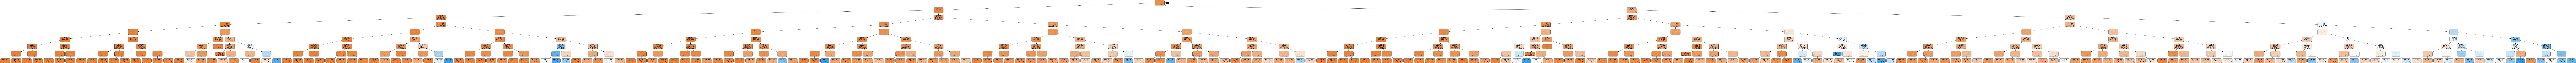

In [28]:
#Creating a list with our features for our visualisation. The number of features in this list has to match with our 'X' in step 3.2!
feature_names = ['GenHlth', 'Age', 'DiffWalk', 'HighBP', 'Stroke', 'PhysHlth', 'HighChol', 'Diabetes', 'Income', 'Education', 'Smoker']

#Creating a StringIO object called dot_data to hold the text representation of the decision tree.
dot_data = StringIO()

export_graphviz(clf_2, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = feature_names, class_names=['No heart disease','Heart disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Saving the tree as .png
graph.write_png('HeartDisease.png')
Image(graph.create_png())

#### 5.1.2 Visualising the 2nd (optimised) tree

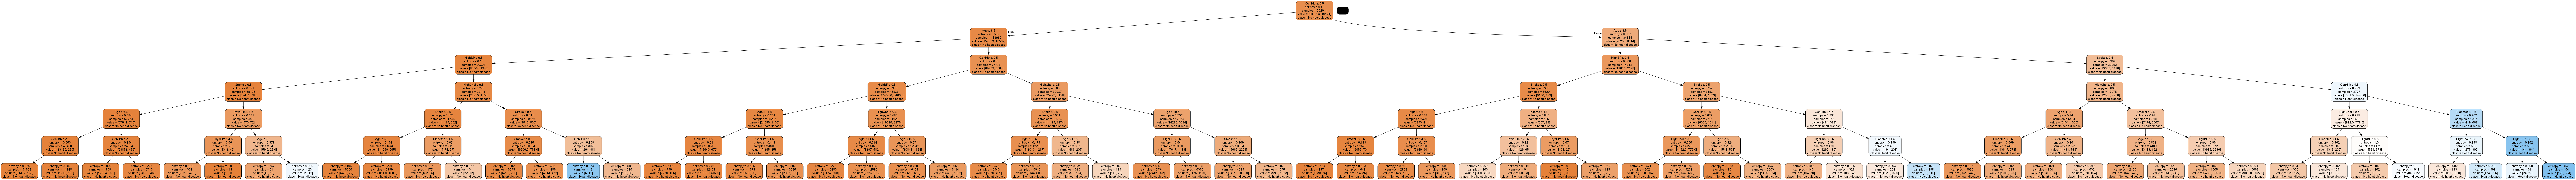

In [42]:
#Creating a list with our features for our visualisation. 
feature_names = ['GenHlth', 'Age', 'DiffWalk', 'HighBP', 'Stroke', 'PhysHlth', 'HighChol', 'Diabetes', 'Income', 'Education', 'Smoker']

#Creating a StringIO object called dot_data to hold the text representation of the decision tree.
dot_data = StringIO()

export_graphviz(clf_2, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True,feature_names = feature_names, class_names=['No heart disease','Heart disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Saving the tree as .png
graph.write_png('HeartDisease2.png')
Image(graph.create_png())

## Remarks

The second model is more accurate because it has a higher max depth. This means that the model can split the data into more levels, which allows it to capture more information. However, this also means that the model is more complex and may be more prone to overfitting. To avoid overfitting, we can use techniques such as cross-validation to find the optimal max depth.

***
***

## 6. K-NN

### K-Nearest Neighbor for Classification

- KNN classifies 'y' based on most probable class, aka. the most common (see picture below).
- One essential decision to make when constructing a KNN classifier is to choose the number of n-neigbours (Ks), since the result/prediction can change based on this!

### 6.1 Importing necessary packages to make a K-NN classification model

In [43]:
#kNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### 6.2 Scaling - standardisation & normalisation

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range - this goes for K-NN. In this section we will only work with standardization. Standardization is a way of adjusting numbers so they're all on the same scale, when training a model.

- **Standardization** rescales a dataset to have a mean of 0 and a standard deviation of 1. 
- **Normalization** rescales a dataset so that each value falls between 0 and 1.

Standardization and normalization are both preprocessing techniques used to scale features in a dataset, but they differ in their purpose, scaling methods, effect on distribution, and robustness to outliers. The choice between standardization and normalization depends on the specific characteristics of the data and the requirements of the machine learning algorithm being used.

Remember! Always scale *after* splitting the dataset into the test and train datasets!

Below, we standardize our training data set (X_train) using StandardScaler.


In [44]:
# Creating a standard scaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transforming the training and test samples using the scaler
X_train_std = scaler.transform(X_train)

# We don't scale our 'y' - target - since it's only an array with 1s and 0s

Let us see what the standardised data looks like now!

In [45]:
# before standardization
X_train

array([[ 2.,  7.,  0., ...,  7.,  5.,  1.],
       [ 3.,  3.,  0., ...,  6.,  5.,  0.],
       [ 1.,  6.,  0., ...,  8.,  6.,  0.],
       ...,
       [ 3., 13.,  1., ...,  6.,  4.,  0.],
       [ 3., 12.,  0., ...,  7.,  5.,  1.],
       [ 3., 12.,  0., ...,  7.,  5.,  1.]])

In [46]:
# after standardization
X_train_std

array([[-0.47863969, -0.33689486, -0.44976564, ...,  0.45658877,
        -0.05272846,  1.12235407],
       [ 0.45796411, -1.64678048, -0.44976564, ..., -0.02653888,
        -0.05272846, -0.89098443],
       [-1.41524348, -0.66436626, -0.44976564, ...,  0.93971643,
         0.96282864, -0.89098443],
       ...,
       [ 0.45796411,  1.62793357,  2.22338018, ..., -0.02653888,
        -1.06828557, -0.89098443],
       [ 0.45796411,  1.30046217, -0.44976564, ...,  0.45658877,
        -0.05272846,  1.12235407],
       [ 0.45796411,  1.30046217, -0.44976564, ...,  0.45658877,
        -0.05272846,  1.12235407]])

In [47]:
# We create an object of the k-NN classifier
# The default number of neighbours is 5 
# However, note that is maybe not the most optimal (more on this later)
model_KNN = KNeighborsClassifier()

In [48]:
# Fit the classifier model to the scaled training data in order to train our model
model_KNN.fit(X_train_std, y_train)

KNeighborsClassifier()

In [49]:
# We now scale the test data
X_test_std = scaler.transform(X_test)

In [50]:
# We make predictions on the test dataset 
y_pred_3 = model_KNN.predict(X_test_std)

In [51]:
# Evaluating the performance of our model on the scaled test data
print("Accuracy: ", accuracy_score(y_test, y_pred_3))

Accuracy:  0.8971933144118575


Our accuracy is ~0.90 = 90%. Not great, not terrible.

We will take a look at how to optimise the number of K with k-fold cross validation.